In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit 
import scipy.special as sf
%matplotlib notebook

In [2]:
x0 = 0
x1 = 2
n = 10000

def f(x):
    return (2/((2**2+x**2)**(3/2)))

In [3]:
x = np.linspace(x0, x1, n)

y = f(x)

In [4]:
fmax = max(y)

x_rand = x0 + (x1 - x0)*np.random.random(n) #between x0 and x1
y_rand = np.random.random(n)*fmax

ind_below = np.where(y_rand < f(x_rand))
ind_above = np.where(y_rand >= f(x_rand))

ratio = float(len(ind_below[0])/n)
area = (x1-x0)*fmax
integral = ratio*area

<IPython.core.display.Javascript object>


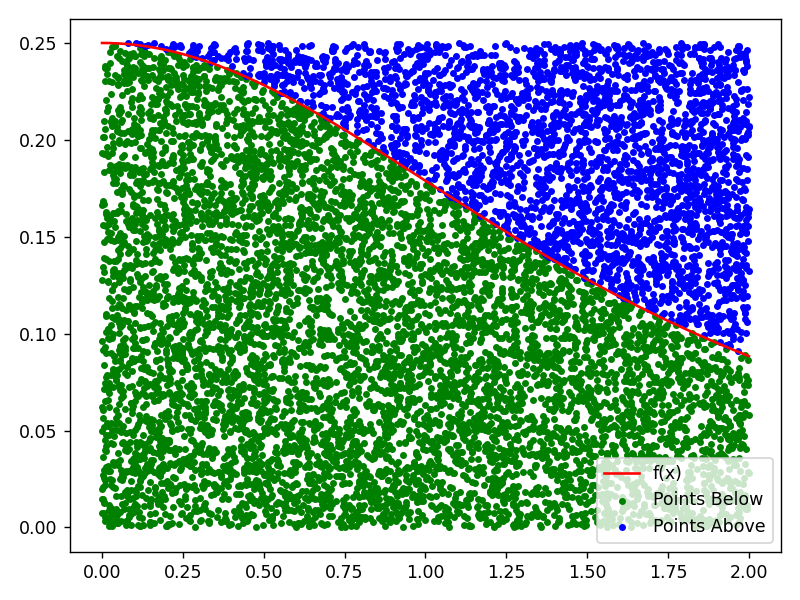

In [5]:
fig = plt.figure('MC Integration')
plt.scatter(x_rand[ind_below], y_rand[ind_below], color = "green", marker = '.',label='Points Below')
plt.scatter(x_rand[ind_above], y_rand[ind_above], color = "blue", marker = '.', label = 'Points Above')
plt.plot(x, y, color = "red", label= 'f(x)')
plt.legend()
plt.tight_layout();

In [6]:
t, n, er = np.loadtxt('decay_data.txt', unpack=True)

<IPython.core.display.Javascript object>


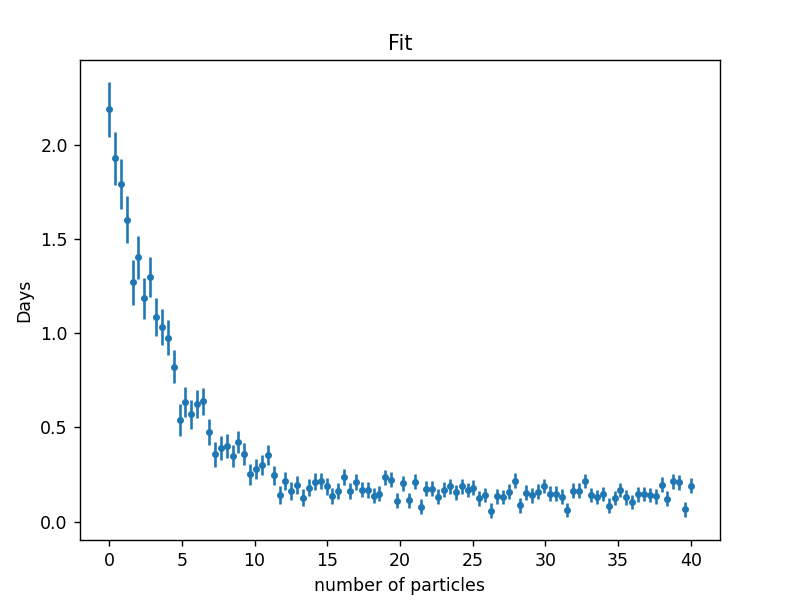

In [7]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_title('Fit')
axes.set_xlabel('number of particles')
axes.set_ylabel('Days')

axes.errorbar(t, n, yerr = er, fmt='.', label = 'Error');

In [8]:
p0, p1, p2 = 35, 5, 1
sigma = 1
n = 100
np.random.seed(0)
h = np.linspace(0,5,n)
g = p0 * np.exp(-t/p1) + p2 + np.random.normal(0, sigma, n)

In [9]:
def func(h, p0, p1):
    return p0 * np.exp(-h/p1) + p2

In [10]:
def get_chi_squared(h, g, sigma, params):
    RR = 0.0
    for i in range(len(h)):
        g_prime = h[i]*params[0] + params[1]
        RR = RR + ( (g[i] - g_prime)/sigma)**2
    return RR

In [11]:
N = 10000
init_par = np.array([0.0,0.0])
par_list, RRs = [init_par], [get_chi_squared(h, g, sigma, init_par)]

for i in range (N):
    test_par = [np.random.normal(par_list[-1][0],0.5),np.random.normal(par_list[-1][1],0.5)]
   
    RR_test = get_chi_squared(h,g,sigma,test_par)
    
    q = (np.random.random() <= (RRs[-1])/RR_test )
    
    if q:
        
        par_list.append(test_par)
        RRs.append(RR_test)
    else:
        #add value of array
        par_list.append(par_list[-1])
        RRs.append(RRs[-1])    
            
RR_min = np.amin(RRs) #find min R2
chisq = RR_min
best_i = RRs.index(RR_min) #Get the index
best_pars = par_list[best_i]  #get the parameters  
print("best m = {0}, best b = {1}, chi**2 = {2}, loc = {3}".format(best_pars[0], best_pars[1], RR_min, best_i) )

best m = -4.344344616138634, best b = 16.585472958269687, chi**2 = 3193.6995089343845, loc = 6771


<IPython.core.display.Javascript object>


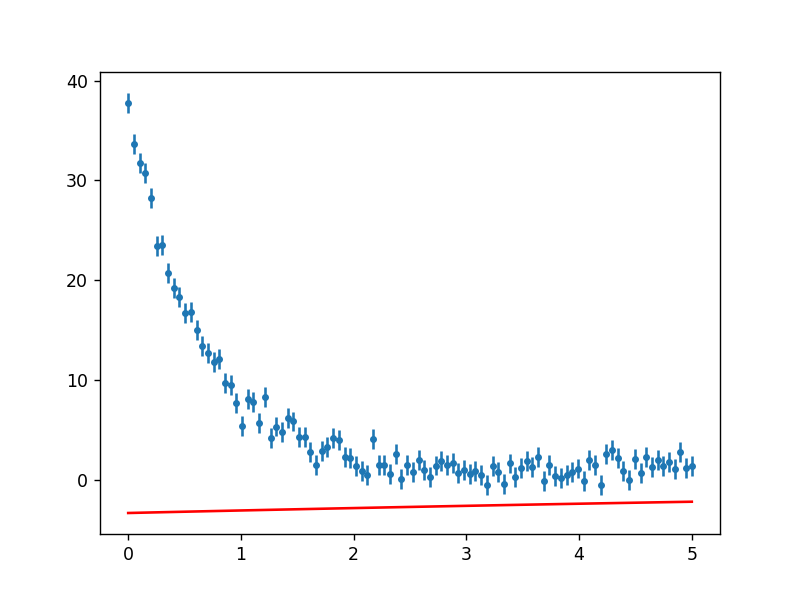

In [12]:
fig = plt.figure('Fitted Data Set')
plt.errorbar(h, g, yerr = sigma, fmt='.')
plt.plot(h,func(h,*best_pars),'r')

In [17]:
dof = n - len(init_par) - 1
pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
print('Fit Results:\n')
print(' chi2 = ',chisq,'\n dof = ', dof, '\n reduced chi2 = ', chisq/dof, '\n p-value = ',pvalue, '\n')

print('This is not a good fit')

Fit Results:

 chi2 =  3193.6995089343845 
 dof =  97 
 reduced chi2 =  32.92473720550912 
 p-value =  0.0 

This is not a good fit


In [18]:
ps = np.array(par_list)

<IPython.core.display.Javascript object>


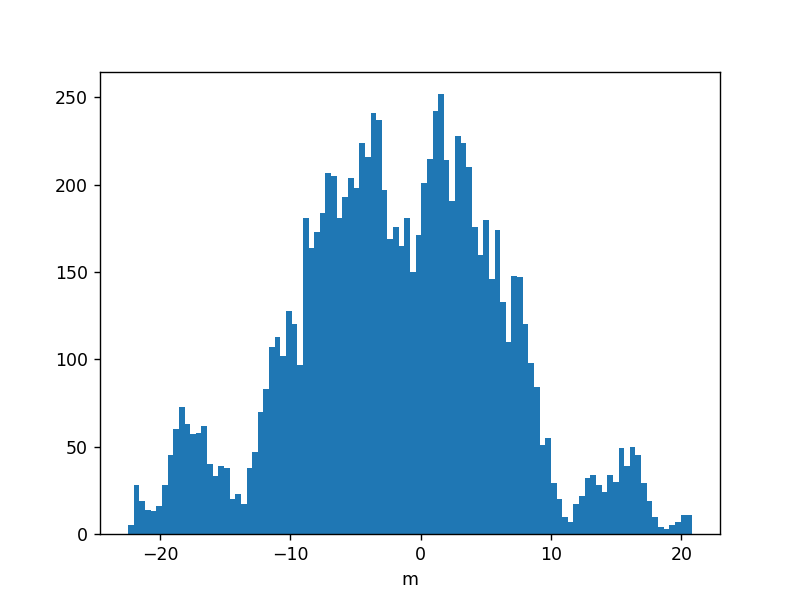

<IPython.core.display.Javascript object>


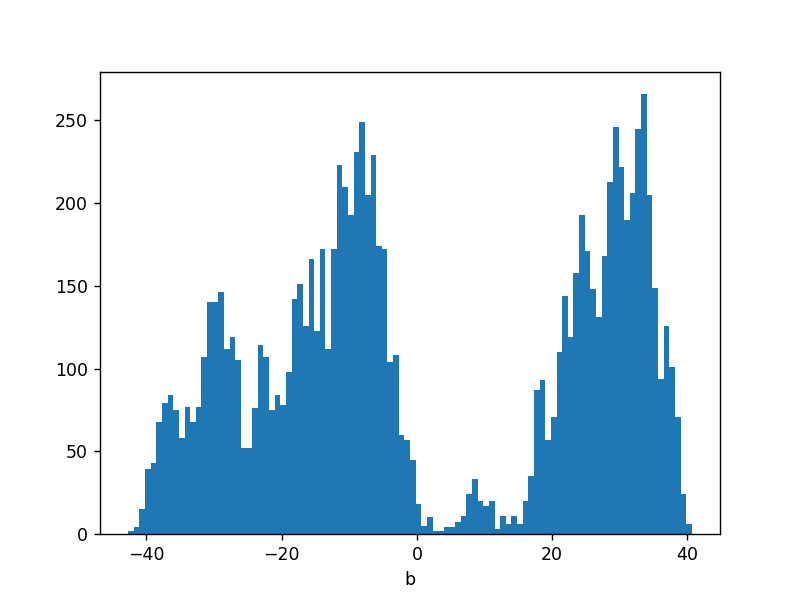

Text(0.5, 0, 'b')

In [23]:
fig1 = plt.figure("2")
#plt.figure(2)
plt.hist(ps[:,0], bins=100)
plt.xlabel("p0")

fig2=plt.figure("3")
plt.hist(ps[:,1], bins=100)
plt.xlabel("p1")